In [1]:
import pandas as pd
from pathlib import Path
import csv
import matplotlib.pyplot as plt

In [2]:
import re
import csv
from pathlib import Path

# 1) raw_text 변수에 전체 텍스트를 복사·붙여넣으세요.
raw_text = """
어제 우리반과 옆반의 설정온도 차이 알려줘 ['Implicit operations'] ['Supported'] ['Value']
오늘 우리반과 옆반의 평균 온도차이 알려줘 ['Implicit conditions'] ['Supported'] ['Value']
작년 겨울 우리반 평균온도 알려줘 ['Implicit conditions'] ['Supported'] ['Value']
올해 여름 앞반 평균온도 알려줘 ['Implicit conditions'] ['Supported'] ['Value']
올해 봄 옆반 제일 추웠던 날 알려줘 ['Implicit conditions'] ['Supported'] ['Temporal']
4월 앞반 평균온도 알려줘 ['Implicit conditions'] ['Supported'] ['Value']
이번달 중 우리반 온도가 가장 덜 더운날이 언제야? ['Implicit conditions', 'Implicit operations'] ['Unsupported'] ['Temporal']
2주전 우리반과 옆반 합쳐서 설정온도가 가장 낮은날이 언제야? ['Basic'] ['Unsupported'] ['Temporal']
이번달 중 뒷반 온도가 가장 더운날이 언제야? ['Unknown', 'Implicit conditions', 'Implicit operations'] ['Unsupported'] ['Temporal']
우리반의 현재 설정 온도 알려줘 ['Basic'] ['Simple get'] ['Value']
8일전 설정온도는? ['Implicit conditions', 'Implicit operations'] ['Supported'] ['Value']
10년 전 오늘 우리반 온도는? ['Unknown', 'Implicit conditions', 'Implicit operations'] ['Supported'] ['Value']
롯데캐슬의 현재 온도 알려줘 ['Unknown', 'Implicit conditions'] ['Simple get'] ['Value']
지금 4층 최대 설정온도 알려줘 ['Basic'] ['Unsupported'] ['Value']
우리반, 옆반, 앞반 중 가장 추운 방은? ['Implicit conditions', 'Implicit operations'] ['Unsupported'] ['Spatial']
지금 에너지 사용량 알려줘 ['Unknown', 'Implicit conditions'] ['Simple get'] ['Value']
지난달 오늘 오후 2시에 옆반의 설정온도는 어땠어? ['Basic'] ['Simple get'] ['Value']
옆반의 현재 온도랑 설정온도 알려줘 ['Implicit conditions'] ['Simple get'] ['Value']
이번주 우리반 평균 온도 알려줘 ['Implicit conditions'] ['Supported'] ['Value']
지난달 설정온도 평균을 알려줘. ['Implicit conditions'] ['Supported'] ['Value']
1층 평균 실내온도 알려줘 ['Unknown', 'Implicit conditions'] ['Supported'] ['Value']
우리반 이번달 제일 추웠던 날은 언제냐? ['Implicit conditions'] ['Unsupported'] ['Temporal']
작년 옆반 가장 더웠던 달은? ['Implicit conditions'] ['Unsupported'] ['Temporal']
오늘 오전 11시에 옆반의 실내온도는 어땠어? ['Basic'] ['Simple get'] ['Value']
오늘 오후 4시부터 6시까지 실내온도 평균 알려줘 ['Implicit conditions'] ['Supported'] ['Value']
지난주에 설정온도와 실내온도 차이가 가장 많이 났던 날은? ['Implicit conditions'] ['Supported', 'Unsupported'] ['Temporal']
우리반과 옆반중 더 추운곳은 어디야? ['Implicit conditions', 'Implicit operations'] ['Unsupported'] ['Spatial']
이번주 우리반과 앞반의 평균 온도 알려줘 ['Implicit conditions'] ['Supported'] ['Value']
현재 설정온도랑 실내온도 차이 알려줘. ['Implicit conditions'] ['Supported'] ['Value']
지난달에 설정온도와 실내온도 차이가 가장 많이 났던 날은? ['Implicit conditions'] ['Supported', 'Unsupported'] ['Temporal']
이번주 우리반과 옆반의 평균 실내온도 차이 알려줘 ['Basic'] ['Supported'] ['Value']
2주전 가장 더웠던 날 알려줘 ['Implicit conditions', 'Implicit operations'] ['Unsupported'] ['Temporal']
화성의 설정온도 확인해줘 ['Unknown', 'Implicit conditions'] ['Simple get'] ['Value']
옆반 습도 알려줘 ['Unknown', 'Unknown'] ['Simple get'] ['Value']
지난 3일 동안 우리반 실내 온도 평균 값 알려줘. ['Basic'] ['Supported'] ['Value']
오늘 오후 5시에 옆반의 설정온도는 어땠어? ['Basic'] ['Simple get'] ['Value']
올해 여름 우리반 실내온도 최대값과 최소값 알려줘 ['Implicit conditions'] ['Supported'] ['Value']
우리반과 앞반 중 가장 더운 방은? ['Implicit conditions', 'Implicit operations'] ['Unsupported'] ['Spatial']
지금 4층 평균 실내온도 알려줘 ['Basic'] ['Supported'] ['Value']
Total datapoint: 39
"""

# 2) 정규식으로 (질문) (첫번째 리스트) (두번째 리스트) (세번째 리스트) 추출
pattern = re.compile(
    r'^(.*?)\s+(\[.*?\])\s+(\[.*?\])\s+(\[.*?\])$',
    re.MULTILINE
)

rows = []
for m in pattern.finditer(raw_text):
    question, cat1, cat2, cat3 = m.groups()
    # 리스트 문자열에서 대괄호와 홑따옴표 제거, 내부 콤마 유지
    clean = lambda s: s.strip('[]').replace("'", "").strip()
    rows.append({
        "Input": question.strip(),
        "Category1": clean(cat1),
        "Category2": clean(cat2),
        "Category3": clean(cat3)
    })

# 3) CSV로 저장
csv_path = Path("hvac_categorization.csv")
with csv_path.open("w", newline="", encoding="utf-8") as f:
    writer = csv.DictWriter(f, fieldnames=["Input", "Category1", "Category2", "Category3"])
    writer.writeheader()
    writer.writerows(rows)

print(f"✅ {csv_path}에 {len(rows)}행 저장 완료!")

✅ hvac_categorization.csv에 39행 저장 완료!


In [3]:
input_class_df = pd.read_csv("hvac_categorization.csv")
input_class_df.columns = ["input", "questionambiguity", "support", "axis"]
print(input_class_df)

                                 input  \
0              어제 우리반과 옆반의 설정온도 차이 알려줘   
1              오늘 우리반과 옆반의 평균 온도차이 알려줘   
2                   작년 겨울 우리반 평균온도 알려줘   
3                    올해 여름 앞반 평균온도 알려줘   
4                 올해 봄 옆반 제일 추웠던 날 알려줘   
5                       4월 앞반 평균온도 알려줘   
6         이번달 중 우리반 온도가 가장 덜 더운날이 언제야?   
7   2주전 우리반과 옆반 합쳐서 설정온도가 가장 낮은날이 언제야?   
8            이번달 중 뒷반 온도가 가장 더운날이 언제야?   
9                    우리반의 현재 설정 온도 알려줘   
10                          8일전 설정온도는?   
11                   10년 전 오늘 우리반 온도는?   
12                     롯데캐슬의 현재 온도 알려줘   
13                   지금 4층 최대 설정온도 알려줘   
14             우리반, 옆반, 앞반 중 가장 추운 방은?   
15                      지금 에너지 사용량 알려줘   
16        지난달 오늘 오후 2시에 옆반의 설정온도는 어땠어?   
17                 옆반의 현재 온도랑 설정온도 알려줘   
18                   이번주 우리반 평균 온도 알려줘   
19                   지난달 설정온도 평균을 알려줘.   
20                      1층 평균 실내온도 알려줘   
21              우리반 이번달 제일 추웠던 날은 언제냐?   
22                    작년 옆반 가장 더웠던

In [4]:
input_tok_len_df = pd.read_csv("tok_lens.csv") # [Input, expertLLM_input_len, expertLLM_output_len, rg_input_len, rg_output_len]
input_tok_len_df.columns = ["input", "expertLLM_input_len", "expertLLM_output_len", "rg_input_len", "rg_output_len"]
print(input_tok_len_df)

                                 input  expertLLM_input_len  \
0              어제 우리반과 옆반의 설정온도 차이 알려줘                   11   
1              오늘 우리반과 옆반의 평균 온도차이 알려줘                   11   
2                   작년 겨울 우리반 평균온도 알려줘                    8   
3                    올해 여름 앞반 평균온도 알려줘                    8   
4                 올해 봄 옆반 제일 추웠던 날 알려줘                   10   
5                       4월 앞반 평균온도 알려줘                    8   
6         이번달 중 우리반 온도가 가장 덜 더운날이 언제야?                   15   
7   2주전 우리반과 옆반 합쳐서 설정온도가 가장 낮은날이 언제야?                   20   
8                    우리반의 현재 설정 온도 알려줘                    7   
9                           8일전 설정온도는?                    6   
10                   10년 전 오늘 우리반 온도는?                   10   
11                   지금 4층 최대 설정온도 알려줘                    9   
12             우리반, 옆반, 앞반 중 가장 추운 방은?                   14   
13        지난달 오늘 오후 2시에 옆반의 설정온도는 어땠어?                   15   
14                 옆반의 현재 온도랑 설정온도 알려줘                 

In [5]:
trial_ids = [1, 2]


time_dfs = []
for trial_id in trial_ids:
    time_front_df = pd.read_csv(f"time_{trial_id}.csv", header=None, on_bad_lines='skip')
    # column: [latency, input]
    time_front_df.columns = ["f_latency", "input"]

    time_back_df = pd.read_csv(f"time_back_{trial_id}.csv")
    time_back_df.columns = ["input", "p_latency", "q_latency", "r_latency"]

    # join on input
    time_df = pd.merge(time_front_df, time_back_df, on="input", how="inner")

    # unique row per input
    # 중복된 input 행을 제거하여 input별로 하나의 행만 남깁니다.
    time_df = time_df.drop_duplicates(subset=["input"]).reset_index(drop=True)
    time_dfs.append(time_df)

time_df = pd.concat(time_dfs)
time_df = time_df.groupby("input").agg({"f_latency": "mean", "p_latency": "mean", "q_latency": "mean", "r_latency": "mean"}).reset_index()
time_df["total_latency"] = time_df["f_latency"] + time_df["p_latency"] + time_df["q_latency"] + time_df["r_latency"]
# print(time_df)
mean_latency = time_df["total_latency"].mean()

# join token elngth and time df
time_df = pd.merge(time_df, input_tok_len_df, on="input", how="inner")

# total_token_length = input_tok_len_df["expertLLM_input_len"] + input_tok_len_df["rg_input_len"] + input_tok_len_df["expertLLM_output_len"] + input_tok_len_df["rg_output_len"]
# print(total_token_length)
time_df["total_token_length"] = time_df["expertLLM_input_len"] + time_df["rg_input_len"] + time_df["expertLLM_output_len"] + time_df["rg_output_len"]
time_df = time_df.drop_duplicates(subset=["input"]).reset_index(drop=True)
print(time_df)
print(mean_latency)

                                 input  f_latency  p_latency  q_latency  \
0                    10년 전 오늘 우리반 온도는?       5.93     0.2320     0.0001   
1                     2주전 가장 더웠던 날 알려줘       6.89     0.9600     0.0016   
2   2주전 우리반과 옆반 합쳐서 설정온도가 가장 낮은날이 언제야?      10.28     0.7950     0.0665   
3                       4월 앞반 평균온도 알려줘       5.36     1.4708     0.0001   
4                           8일전 설정온도는?       5.67     0.6972     0.0002   
5              어제 우리반과 옆반의 설정온도 차이 알려줘       9.24     0.9529     0.0004   
6                  옆반의 현재 온도랑 설정온도 알려줘       5.85     0.2491     0.0002   
7            오늘 오전 11시에 옆반의 실내온도는 어땠어?       5.62     0.2429     0.0001   
8          오늘 오후 4시부터 6시까지 실내온도 평균 알려줘       6.72     0.2488     0.0002   
9             오늘 오후 5시에 옆반의 설정온도는 어땠어?       5.51     0.2347     0.0001   
10             오늘 우리반과 옆반의 평균 온도차이 알려줘       9.80     0.7627     0.0003   
11                올해 봄 옆반 제일 추웠던 날 알려줘       9.86     3.0282     0.0009   
12                   올해 여

In [6]:
time_df = pd.merge(time_df, input_class_df, on="input", how="inner")
print(time_df)

                                 input  f_latency  p_latency  q_latency  \
0                    10년 전 오늘 우리반 온도는?       5.93     0.2320     0.0001   
1                     2주전 가장 더웠던 날 알려줘       6.89     0.9600     0.0016   
2   2주전 우리반과 옆반 합쳐서 설정온도가 가장 낮은날이 언제야?      10.28     0.7950     0.0665   
3                       4월 앞반 평균온도 알려줘       5.36     1.4708     0.0001   
4                           8일전 설정온도는?       5.67     0.6972     0.0002   
5              어제 우리반과 옆반의 설정온도 차이 알려줘       9.24     0.9529     0.0004   
6                  옆반의 현재 온도랑 설정온도 알려줘       5.85     0.2491     0.0002   
7            오늘 오전 11시에 옆반의 실내온도는 어땠어?       5.62     0.2429     0.0001   
8          오늘 오후 4시부터 6시까지 실내온도 평균 알려줘       6.72     0.2488     0.0002   
9             오늘 오후 5시에 옆반의 설정온도는 어땠어?       5.51     0.2347     0.0001   
10             오늘 우리반과 옆반의 평균 온도차이 알려줘       9.80     0.7627     0.0003   
11                올해 봄 옆반 제일 추웠던 날 알려줘       9.86     3.0282     0.0009   
12                   올해 여

In [7]:
# group by support, group by axis
time_df_support = time_df.groupby("support").agg({"f_latency": "mean", "p_latency": "mean", "q_latency": "mean", "r_latency": "mean", "total_latency": "mean", "total_token_length": "mean"}).reset_index()
time_df_questionambiguity = time_df.groupby("questionambiguity").agg({"f_latency": "mean", "p_latency": "mean", "q_latency": "mean", "r_latency": "mean", "total_latency": "mean", "total_token_length": "mean"}).reset_index()
time_df_axis = time_df.groupby("axis").agg({"f_latency": "mean", "p_latency": "mean", "q_latency": "mean", "r_latency": "mean", "total_latency": "mean", "total_token_length": "mean"}).reset_index()
time_df_axis.to_csv("time_df_axis.csv", index=False)
time_df_support.to_csv("time_df_support.csv", index=False)
time_df_questionambiguity.to_csv("time_df_questionambiguity.csv", index=False)

print(time_df_support)
print(time_df_questionambiguity)


                  support  f_latency  p_latency  q_latency  r_latency  \
0              Simple get   5.470000   0.239800   0.000120   0.385380   
1               Supported   6.914706   1.558947   0.000276   0.452288   
2  Supported, Unsupported  17.645000   1.497100   0.002900   1.292750   
3             Unsupported  10.590000   2.104733   0.008089   0.619322   

   total_latency  total_token_length  
0       6.095300          335.000000  
1       8.926218          427.235294  
2      20.437750         1055.000000  
3      13.322144          590.111111  
                                   questionambiguity  f_latency  p_latency  \
0                                              Basic   6.173333   0.589678   
1                                Implicit conditions   8.557500   2.452019   
2           Implicit conditions, Implicit operations  11.308333   0.652267   
3                                Implicit operations   9.240000   0.952900   
4  Unknown, Implicit conditions, Implicit operati

In [8]:
print(time_df.shape)

(33, 14)


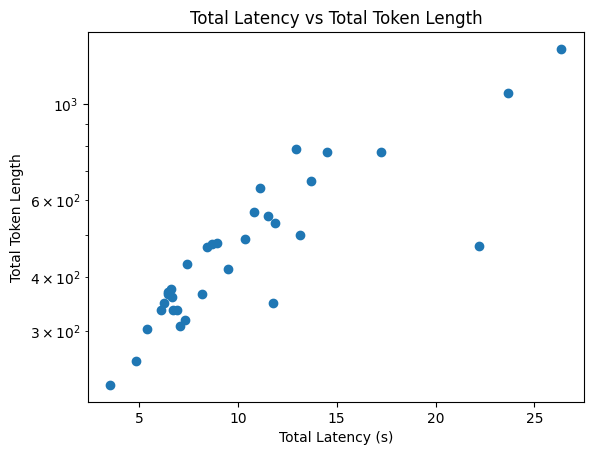

In [9]:
# draw scatter plot of total latency and total token length


plt.scatter(time_df["total_latency"], time_df["total_token_length"])
# x axis: total token length
# y axis: total latency'
plt.yscale("log")
plt.ylabel("Total Token Length")
plt.xlabel("Total Latency (s)")
plt.title("Total Latency vs Total Token Length")
plt.show()


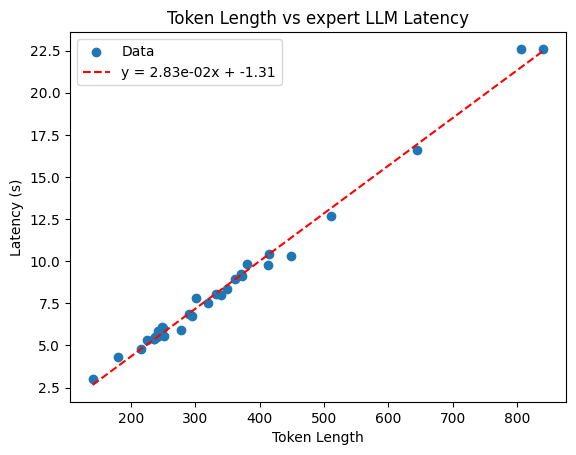

In [24]:
# 토큰 길이와 expert LLM latency의 산점도를 그리고, y=ax+b 직선에 피팅합니다. (Draw scatter plot and fit y=ax+b)

import numpy as np
from scipy.optimize import curve_fit

# x: total token length, y: latency
x = time_df["expertLLM_input_len"] + time_df["expertLLM_output_len"]
y = time_df["f_latency"]


# x, y 값을 복사해서 다른 파이썬 환경에서 사용할 수 있도록 출력합니다. (Print x and y for copy-paste to other python)
print("x =", list(x))
print("y =", list(y))


plt.scatter(x, y, label="Data")

# 1차 함수 피팅 함수 정의 (Define linear fitting function: y = ax + b)
def linear_func(x, a, b):
    return a * x + b

# y = ax + b 피팅 (Fit y = ax + b)
popt_linear, _ = curve_fit(linear_func, x, y)
# x_fit 생성 (Generate x values for smooth curve)
x_fit = np.linspace(x.min(), x.max(), 200)
y_fit_linear = linear_func(x_fit, *popt_linear)

# 피팅 곡선 그리기 (Plot fitted linear curve)
plt.plot(x_fit, y_fit_linear, color='red', linestyle='--', 
         label=f'y = {popt_linear[0]:.2e}x + {popt_linear[1]:.2f}')

plt.xlabel("Token Length")
plt.ylabel("Latency (s)")
plt.title("Token Length vs expert LLM Latency")
plt.legend()
plt.show()

# 설명: 이 코드는 토큰 길이(x)와 expert LLM latency(y)의 산점도를 그리고, y=ax+b 형태로 곡선을 피팅하여 시각화합니다.


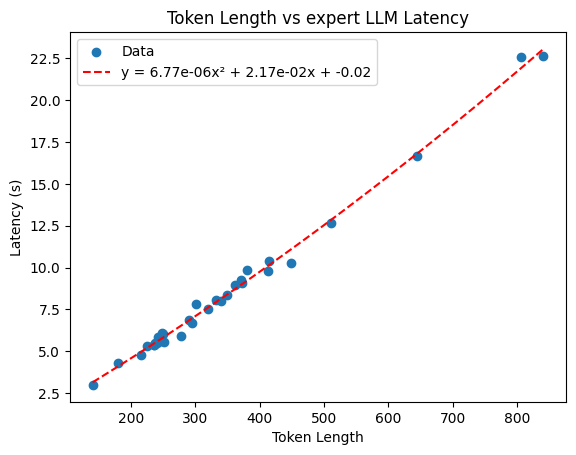

In [23]:
# 토큰 길이와 expert LLM latency의 산점도를 그리고, y=ax^2+c, y=e^x+c 곡선을 피팅하여 함께 그립니다. (Draw scatter plot and fit y=ax^2+c, y=e^x+c)

import numpy as np
from scipy.optimize import curve_fit

# x: total token length, y: latency
x = time_df["expertLLM_input_len"] + time_df["expertLLM_output_len"]
y = time_df["f_latency"]

plt.scatter(x, y, label="Data")

# 2차 함수 피팅 함수 정의 (Define quadratic fitting function: y = ax^2 + bx + c)
def quad_func(x, a, b, c):
    return a * x**2 + b * x + c

# y = ax^2 + bx + c 피팅 (Fit y = ax^2 + bx + c)
popt_quad, _ = curve_fit(quad_func, x, y, maxfev=10000)
# x_fit 생성 (Generate x values for smooth curve)
x_fit = np.linspace(x.min(), x.max(), 200)
y_fit_quad = quad_func(x_fit, *popt_quad)

# 피팅 곡선 그리기 (Plot fitted curve)
plt.plot(x_fit, y_fit_quad, color='red', linestyle='--', 
         label=f'y = {popt_quad[0]:.2e}x² + {popt_quad[1]:.2e}x + {popt_quad[2]:.2f}')

plt.xlabel("Token Length")
plt.ylabel("Latency (s)")
plt.title("Token Length vs expert LLM Latency")
plt.legend()
plt.show()

# 설명: 이 코드는 토큰 길이(x)와 expert LLM latency(y)의 산점도를 그리고, y=ax^2+c, y=a·e^x+c 형태로 각각 곡선을 피팅하여 시각화합니다.


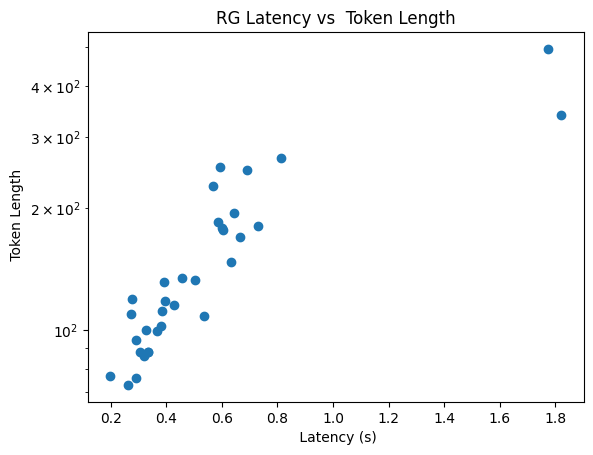

In [11]:
# draw scatter plot of total latency and total token length


plt.scatter(time_df["r_latency"], time_df["rg_input_len"] + time_df["rg_output_len"])
# x axis: total token length
# y axis: total latency'
plt.yscale("log")
plt.ylabel(" Token Length")
plt.xlabel(" Latency (s)")
plt.title("RG Latency vs  Token Length")
plt.show()


In [12]:
# copy df and sort by f_latency
time_df_sorted = time_df.copy()
time_df_sorted = time_df_sorted.sort_values(by="f_latency")
print(time_df_sorted)

# draw scatter plot of total latency and total token length



                                 input  f_latency  p_latency  q_latency  \
26                   지금 4층 평균 실내온도 알려줘       3.00     0.2378     0.0002   
18                   우리반의 현재 설정 온도 알려줘       4.30     0.2401     0.0001   
25                   지금 4층 최대 설정온도 알려줘       4.81     0.2431     0.0001   
28                   지난달 설정온도 평균을 알려줘.       5.32     1.7403     0.0003   
3                       4월 앞반 평균온도 알려줘       5.36     1.4708     0.0001   
20                   이번주 우리반 평균 온도 알려줘       5.38     1.2406     0.0002   
9             오늘 오후 5시에 옆반의 설정온도는 어땠어?       5.51     0.2347     0.0001   
23                  작년 겨울 우리반 평균온도 알려줘       5.52     5.7267     0.0001   
27        지난 3일 동안 우리반 실내 온도 평균 값 알려줘.       5.57     0.4852     0.0002   
7            오늘 오전 11시에 옆반의 실내온도는 어땠어?       5.62     0.2429     0.0001   
4                           8일전 설정온도는?       5.67     0.6972     0.0002   
6                  옆반의 현재 온도랑 설정온도 알려줘       5.85     0.2491     0.0002   
0                    10년 

In [30]:
time_df_support = time_df.copy()
# 'support' 컬럼에서 'Simple get'이 아닌 값은 모두 'merge'로 변경합니다.
time_df_support['support'] = time_df_support['support'].apply(lambda x: x if x == 'Simple get' else 'merge')

# 'support'별로 평균(mean)과 표준편차(std)를 집계합니다.
time_df_support = time_df_support.groupby("support").agg(
    {
        "f_latency": ["mean", "std"],
        "p_latency": ["mean", "std"],
        "q_latency": ["mean", "std"],
        "r_latency": ["mean", "std"],
        "total_latency": ["mean", "std"],
        "total_token_length": ["mean", "std"]
    }
).reset_index()
# 컬럼 이름을 보기 좋게 만듭니다.
time_df_support.columns = ['_'.join(col).strip('_') for col in time_df_support.columns.values]

# 소수점 둘째자리까지 반올림하여 출력합니다.
time_df_support.round(2)

# 평균(mean)과 표준편차(std)를 "mean ± std" 형태로 출력합니다.
# 각 support별로 주요 latency 및 token length에 대해 출력합니다.

for idx, row in time_df_support.iterrows():
    support = row['support']
    f_latency_mean = row['f_latency_mean']
    f_latency_std = row['f_latency_std']
    p_latency_mean = row['p_latency_mean']
    p_latency_std = row['p_latency_std']
    q_latency_mean = row['q_latency_mean']
    q_latency_std = row['q_latency_std']
    r_latency_mean = row['r_latency_mean']
    r_latency_std = row['r_latency_std']
    total_latency_mean = row['total_latency_mean']
    total_latency_std = row['total_latency_std']
    total_token_length_mean = row['total_token_length_mean']
    total_token_length_std = row['total_token_length_std']

    # 각 항목을 "mean ± std" 형태로 출력합니다.
    print(f"Support: {support}")
    print(f"  f_latency: {f_latency_mean:.2f} ± {f_latency_std:.2f}")
    print(f"  p_latency: {p_latency_mean:.2f} ± {p_latency_std:.2f}")
    print(f"  q_latency: {q_latency_mean:.2f} ± {q_latency_std:.2f}")
    print(f"  r_latency: {r_latency_mean:.2f} ± {r_latency_std:.2f}")
    print(f"  total_latency: {total_latency_mean:.2f} ± {total_latency_std:.2f}")
    print(f"  total_token_length: {total_token_length_mean:.2f} ± {total_token_length_std:.2f}")
    print("-" * 40)



Support: Simple get
  f_latency: 5.47 ± 0.69
  p_latency: 0.24 ± 0.01
  q_latency: 0.00 ± 0.00
  r_latency: 0.39 ± 0.08
  total_latency: 6.10 ± 0.75
  total_token_length: 335.00 ± 46.41
----------------------------------------
Support: merge
  f_latency: 8.86 ± 4.74
  p_latency: 1.73 ± 2.51
  q_latency: 0.00 ± 0.01
  r_latency: 0.57 ± 0.39
  total_latency: 11.16 ± 5.51
  total_token_length: 524.43 ± 244.16
----------------------------------------


In [39]:
# 'questionambiguity'별로 평균(mean)과 표준편차(std)를 집계합니다.
# 'support'가 아니라 'questionambiguity' 기준으로 집계하도록 변경합니다.
time_df_qa = time_df.copy()

print(np.unique(time_df_qa['questionambiguity'], return_counts=True))

# Unknown이 '포함'되어 있거나  'Basic'을 제외하고 모두 merge
time_df_qa['questionambiguity'] = time_df_qa['questionambiguity'].apply(
    lambda x: 'merge' if 'Basic' not in x else x)

print(np.unique(time_df_qa['questionambiguity'], return_counts=True))

# 'questionambiguity'별로 평균(mean)과 표준편차(std)를 집계합니다.
time_df_qa = time_df_qa.groupby("questionambiguity").agg(
    {
        "f_latency": ["mean", "std"],
        "p_latency": ["mean", "std"],
        "q_latency": ["mean", "std"],
        "r_latency": ["mean", "std"],
        "total_latency": ["mean", "std"],
        "total_token_length": ["mean", "std"]
    }
).reset_index()

# 컬럼 이름을 보기 좋게 만듭니다.
time_df_qa.columns = ['_'.join(col).strip('_') for col in time_df_qa.columns.values]

# 소수점 둘째자리까지 반올림하여 출력합니다.
time_df_qa.round(2)

# 평균(mean)과 표준편차(std)를 "mean ± std" 형태로 출력합니다.
# 각 questionambiguity별로 주요 latency 및 token length에 대해 출력합니다.
for idx, row in time_df_qa.iterrows():
    questionambiguity = row['questionambiguity']
    f_latency_mean = row['f_latency_mean']
    f_latency_std = row['f_latency_std']
    p_latency_mean = row['p_latency_mean']
    p_latency_std = row['p_latency_std']
    q_latency_mean = row['q_latency_mean']
    q_latency_std = row['q_latency_std']
    r_latency_mean = row['r_latency_mean']
    r_latency_std = row['r_latency_std']
    total_latency_mean = row['total_latency_mean']
    total_latency_std = row['total_latency_std']
    total_token_length_mean = row['total_token_length_mean']
    total_token_length_std = row['total_token_length_std']

    # 각 항목을 "mean ± std" 형태로 출력합니다.
    print(f"Question Ambiguity: {questionambiguity}")
    print(f"  f_latency: {f_latency_mean:.2f} ± {f_latency_std:.2f}")
    print(f"  p_latency: {p_latency_mean:.2f} ± {p_latency_std:.2f}")
    print(f"  q_latency: {q_latency_mean:.2f} ± {q_latency_std:.2f}")
    print(f"  r_latency: {r_latency_mean:.2f} ± {r_latency_std:.2f}")
    print(f"  total_latency: {total_latency_mean:.2f} ± {total_latency_std:.2f}")
    print(f"  total_token_length: {total_token_length_mean:.2f} ± {total_token_length_std:.2f}")
    print("-" * 40)


(array(['Basic', 'Implicit conditions',
       'Implicit conditions, Implicit operations', 'Implicit operations',
       'Unknown, Implicit conditions, Implicit operations'], dtype=object), array([ 9, 16,  6,  1,  1]))
(array(['Basic', 'merge'], dtype=object), array([ 9, 24]))
Question Ambiguity: Basic
  f_latency: 6.17 ± 2.53
  p_latency: 0.59 ± 0.78
  q_latency: 0.01 ± 0.02
  r_latency: 0.55 ± 0.49
  total_latency: 7.32 ± 3.54
  total_token_length: 405.33 ± 189.88
----------------------------------------
Question Ambiguity: merge
  f_latency: 9.16 ± 4.88
  p_latency: 1.85 ± 2.67
  q_latency: 0.00 ± 0.00
  r_latency: 0.53 ± 0.31
  total_latency: 11.54 ± 5.57
  total_token_length: 529.62 ± 245.03
----------------------------------------


In [40]:
# 'axis'별로 평균(mean)과 표준편차(std)를 집계합니다.
# 'support'가 아니라 'axis' 기준으로 집계하도록 변경합니다.
time_df_axis_stat = time_df.copy()

# axis별 데이터 개수 출력
print(np.unique(time_df_axis_stat['axis'], return_counts=True))

# 'axis'별로 평균(mean)과 표준편차(std)를 집계합니다.
time_df_axis_stat = time_df_axis_stat.groupby("axis").agg(
    {
        "f_latency": ["mean", "std"],
        "p_latency": ["mean", "std"],
        "q_latency": ["mean", "std"],
        "r_latency": ["mean", "std"],
        "total_latency": ["mean", "std"],
        "total_token_length": ["mean", "std"]
    }
).reset_index()

# 컬럼 이름을 보기 좋게 만듭니다.
time_df_axis_stat.columns = ['_'.join(col).strip('_') for col in time_df_axis_stat.columns.values]

# 소수점 둘째자리까지 반올림하여 출력합니다.
time_df_axis_stat.round(2)

# 평균(mean)과 표준편차(std)를 "mean ± std" 형태로 출력합니다.
# 각 axis별로 주요 latency 및 token length에 대해 출력합니다.
for idx, row in time_df_axis_stat.iterrows():
    axis = row['axis']
    f_latency_mean = row['f_latency_mean']
    f_latency_std = row['f_latency_std']
    p_latency_mean = row['p_latency_mean']
    p_latency_std = row['p_latency_std']
    q_latency_mean = row['q_latency_mean']
    q_latency_std = row['q_latency_std']
    r_latency_mean = row['r_latency_mean']
    r_latency_std = row['r_latency_std']
    total_latency_mean = row['total_latency_mean']
    total_latency_std = row['total_latency_std']
    total_token_length_mean = row['total_token_length_mean']
    total_token_length_std = row['total_token_length_std']

    # 각 항목을 "mean ± std" 형태로 출력합니다.
    print(f"Axis: {axis}")
    print(f"  f_latency: {f_latency_mean:.2f} ± {f_latency_std:.2f}")
    print(f"  p_latency: {p_latency_mean:.2f} ± {p_latency_std:.2f}")
    print(f"  q_latency: {q_latency_mean:.2f} ± {q_latency_std:.2f}")
    print(f"  r_latency: {r_latency_mean:.2f} ± {r_latency_std:.2f}")
    print(f"  total_latency: {total_latency_mean:.2f} ± {total_latency_std:.2f}")
    print(f"  total_token_length: {total_token_length_mean:.2f} ± {total_token_length_std:.2f}")
    print("-" * 40)


(array(['Spatial', 'Temporal', 'Value'], dtype=object), array([ 3,  8, 22]))
Axis: Spatial
  f_latency: 15.76 ± 7.28
  p_latency: 0.32 ± 0.14
  q_latency: 0.00 ± 0.00
  r_latency: 0.54 ± 0.13
  total_latency: 16.62 ± 7.36
  total_token_length: 771.00 ± 289.53
----------------------------------------
Axis: Temporal
  f_latency: 11.05 ± 4.97
  p_latency: 2.97 ± 4.10
  q_latency: 0.01 ± 0.02
  r_latency: 0.81 ± 0.65
  total_latency: 14.84 ± 6.25
  total_token_length: 663.00 ± 305.75
----------------------------------------
Axis: Value
  f_latency: 6.36 ± 1.81
  p_latency: 1.13 ± 1.33
  q_latency: 0.00 ± 0.00
  r_latency: 0.44 ± 0.14
  total_latency: 7.93 ± 2.60
  total_token_length: 397.36 ± 116.37
----------------------------------------


In [ ]:
# group by support, group by axis
time_df_support = time_df.groupby("support").agg({"f_latency": "mean", "p_latency": "mean", "q_latency": "mean", "r_latency": "mean", "total_latency": "mean", "total_token_length": "mean"}).reset_index()


time_df_questionambiguity = time_df.groupby("questionambiguity").agg({"f_latency": "mean", "p_latency": "mean", "q_latency": "mean", "r_latency": "mean", "total_latency": "mean", "total_token_length": "mean"}).reset_index()
time_df_axis = time_df.groupby("axis").agg({"f_latency": "mean", "p_latency": "mean", "q_latency": "mean", "r_latency": "mean", "total_latency": "mean", "total_token_length": "mean"}).reset_index()
time_df_axis.to_csv("time_df_axis.csv", index=False)
time_df_support.to_csv("time_df_support.csv", index=False)
time_df_questionambiguity.to_csv("time_df_questionambiguity.csv", index=False)
print(time_df_support)
print(time_df_questionambiguity)